# Sentiment Analysis in Python

This notebook is part of a tutorial that can be found on my [youtube channel here](https://www.youtube.com/channel/UCxladMszXan-jfgzyeIMyvw), please check it out!

In this notebook we will be doing some sentiment analysis in python using two different techniques:
1. VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from 🤗
3. Huggingface Pipeline

# Step 0. Read in Data and NLTK Basics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
#importar arquivo .jason do API do kaggle. Conta -> Configurações -> API -> Criar Token
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"username","key":"key"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets list

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/countries-of-the-world-2023                          Global Country Information Dataset 2023             23KB  2023-07-08 20:37:33          11632        464  1.0              
nelgiriyewithana/global-youtube-statistics-2023                       Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           3682        136  1.0              
joebeachcapital/global-earth-temperatures                             Global Earth Temperatures                           33KB  2023-08-09 06:21:51            773         29  1.0              
arnavsmayan/netflix-userbase-datase

In [ ]:
!kaggle datasets download -d snap/amazon-fine-food-reviews --force

 99% 240M/242M [00:10<00:00, 30.1MB/s]
100% 242M/242M [00:10<00:00, 24.8MB/s]


In [ ]:
!unzip -q /content/amazon-fine-food-reviews.zip -d /content/sample_data/

In [ ]:
# Read in data
df = pd.read_csv('/content/sample_data/Reviews.csv')
print(df.shape)
df = df.head(500)
print(df.shape)

(568454, 10)
(500, 10)


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df["Text"].values[1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

## Quick EDA

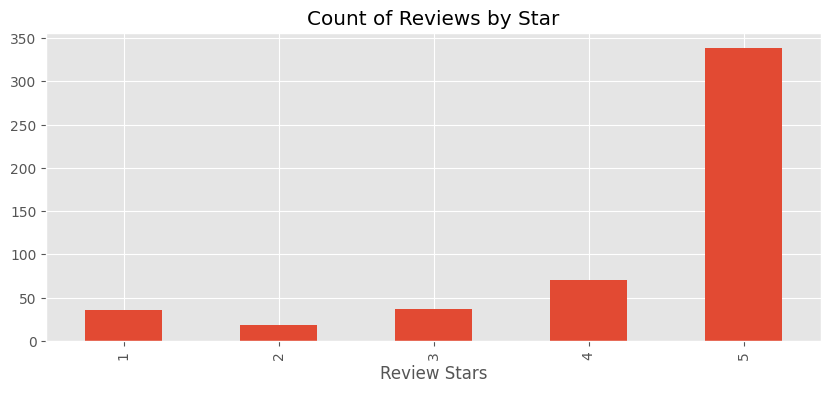

In [ ]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar',title='Count of Reviews by Star', figsize=(10,4))
ax.set_xlabel("Review Stars")
plt.show()

## Basic NLTK

In [ ]:
example = df['Text'].values[80]
print(example)

This peppermint stick is delicious and fun to eat.  My dad got me one for Christmas because he remembered me having a similar one when I was a little girl.  I'm 30 now and I love it!


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('popular')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data.

True

In [ ]:
tokens=nltk.word_tokenize(example)
tokens[:5]

['This', 'peppermint', 'stick', 'is', 'delicious']

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged[:5]

[('This', 'DT'),
 ('peppermint', 'NN'),
 ('stick', 'NN'),
 ('is', 'VBZ'),
 ('delicious', 'JJ')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  peppermint/NN
  stick/NN
  is/VBZ
  delicious/JJ
  and/CC
  fun/NN
  to/TO
  eat/VB
  ./.
  My/PRP$
  dad/NN
  got/VBD
  me/PRP
  one/CD
  for/IN
  (PERSON Christmas/NNP)
  because/IN
  he/PRP
  remembered/VBD
  me/PRP
  having/VBG
  a/DT
  similar/JJ
  one/CD
  when/WRB
  I/PRP
  was/VBD
  a/DT
  little/JJ
  girl/NN
  ./.
  I/PRP
  'm/VBP
  30/CD
  now/RB
  and/CC
  I/PRP
  love/VBP
  it/PRP
  !/.)


# Step 1. VADER Seniment Scoring

We will use NLTK's `SentimentIntensityAnalyzer` to get the neg/neu/pos scores of the text.

- This uses a "bag of words" approach:
    1. Stop words are removed
    2. each word is scored and combined to a total score.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia

In [ ]:
sia.polarity_scores("This food is so good")

{'neg': 0.0, 'neu': 0.517, 'pos': 0.483, 'compound': 0.5777}

In [ ]:
sia.polarity_scores("This food is so great and good but then it gets bad")

{'neg': 0.251, 'neu': 0.475, 'pos': 0.275, 'compound': -0.14}

In [ ]:
sia.polarity_scores("This food is so bad")

{'neg': 0.529, 'neu': 0.471, 'pos': 0.0, 'compound': -0.6696}

In [ ]:
print(example)
sia.polarity_scores(example)

This peppermint stick is delicious and fun to eat.  My dad got me one for Christmas because he remembered me having a similar one when I was a little girl.  I'm 30 now and I love it!


{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9098}

In [ ]:
vader_res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  id = row['Id']
  vader_res[id] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
vaders = pd.DataFrame(vader_res).T
vaders.columns = ['vaders_neg','vaders_neu','vaders_pos','vaders_comp']
vaders = vaders.reset_index().rename(columns={'index':'Id'})
vaders = vaders.merge(df[['Id','Score','Text']], how='left')
vaders.head()

,Id,vaders_neg,vaders_neu,vaders_pos,vaders_comp,Score,Text
0,1,0.000,0.695,0.305,0.9441,5,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,4,This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,2,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,5,Great taffy at a great price. There was a wid...


## Plot VADER results

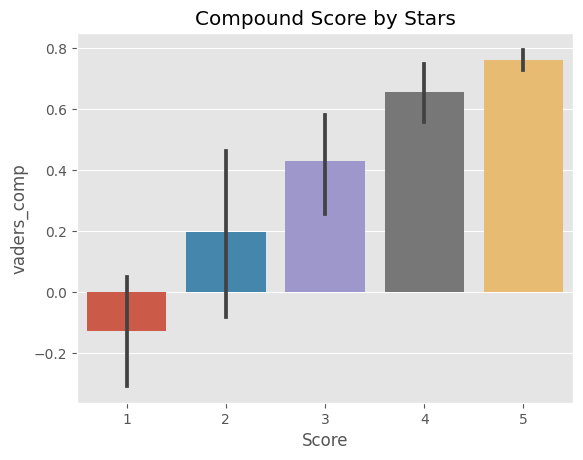

In [ ]:
ax = sns.barplot(data=vaders, x='Score', y='vaders_comp')
ax.set_title('Compound Score by Stars')
plt.show()

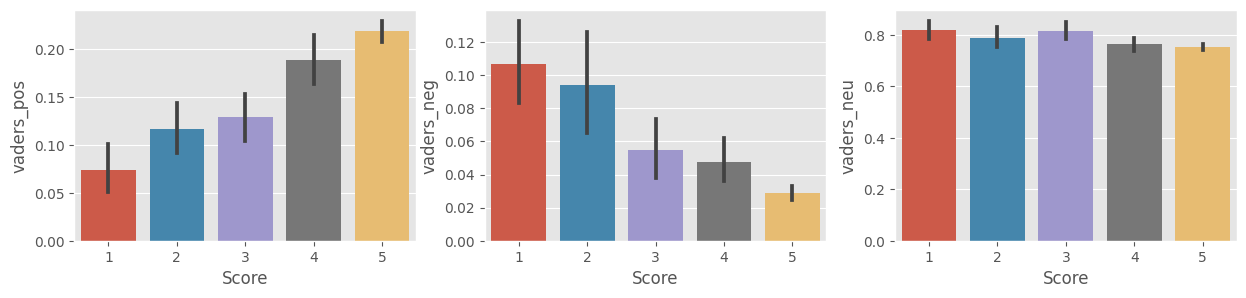

In [ ]:
fig, axs = plt.subplots(1,3, figsize=(15,3))
sns.barplot(data=vaders, x='Score', y='vaders_pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='vaders_neg', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='vaders_neu', ax=axs[2])
plt.show()

# Step 3. Roberta Pretrained Model

- Use a model trained of a large corpus of data.
- Transformer model accounts for the words but also the context related to other words.

In [ ]:
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 44.9 MB/s eta 0:00:00


In [ ]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
print(example)
sia.polarity_scores(example)

This peppermint stick is delicious and fun to eat.  My dad got me one for Christmas because he remembered me having a similar one when I was a little girl.  I'm 30 now and I love it!


{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'compound': 0.9098}

In [ ]:
encoded = tokenizer(example, return_tensors='pt')
output = model(**encoded)
scores = softmax(output[0][0].detach().numpy())
print(example)
scores

This peppermint stick is delicious and fun to eat.  My dad got me one for Christmas because he remembered me having a similar one when I was a little girl.  I'm 30 now and I love it!


array([0.00157211, 0.0062695 , 0.9921584 ], dtype=float32)

In [ ]:
def roberta(text):
  encoded = tokenizer(text, return_tensors='pt')
  output = model(**encoded)
  scores = softmax(output[0][0].detach().numpy())
  res = {
      'roberta_neg':scores[0],
      'roberta_neu':scores[1],
      'roberta_pos':scores[2]
  }
  return res

In [ ]:
roberta_res = {}
for i,row in tqdm(df.iterrows(), total=len(df)):
  text = row['Text']
  id = row['Id']
  try:
    roberta_res[id] = roberta(text)
  except RuntimeError:
      roberta_res[id] = {
      'roberta_neg':None,
      'roberta_neu':None,
      'roberta_pos':None
  }

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
roberta = pd.DataFrame(roberta_res).T
roberta = roberta.reset_index().rename(columns={'index':'Id'})
roberta = roberta.merge(df[['Id','Score','Text']], how='left')
roberta.head()

,Id,roberta_neg,roberta_neu,roberta_pos,Score,Text
0,1,0.009624,0.04998,0.940395,5,I have bought several of the Vitality canned d...
1,2,0.508986,0.452414,0.0386,1,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.003229,0.098067,0.898704,4,This is a confection that has been around a fe...
3,4,0.002295,0.090219,0.907486,2,If you are looking for the secret ingredient i...
4,5,0.001635,0.010302,0.988063,5,Great taffy at a great price. There was a wid...


# Step 3. Combine and compare

## Compare Scores between models

In [ ]:
results = vaders.merge(roberta)
results=results.dropna()
results.head()

,Id,vaders_neg,vaders_neu,vaders_pos,vaders_comp,Score,Text,roberta_neg,roberta_neu,roberta_pos
0,1,0.000,0.695,0.305,0.9441,5,I have bought several of the Vitality canned d...,0.009624,0.04998,0.940395
1,2,0.138,0.862,0.000,-0.5664,1,Product arrived labeled as Jumbo Salted Peanut...,0.508986,0.452414,0.0386
2,3,0.091,0.754,0.155,0.8265,4,This is a confection that has been around a fe...,0.003229,0.098067,0.898704
3,4,0.000,1.000,0.000,0.0000,2,If you are looking for the secret ingredient i...,0.002295,0.090219,0.907486
4,5,0.000,0.552,0.448,0.9468,5,Great taffy at a great price. There was a wid...,0.001635,0.010302,0.988063


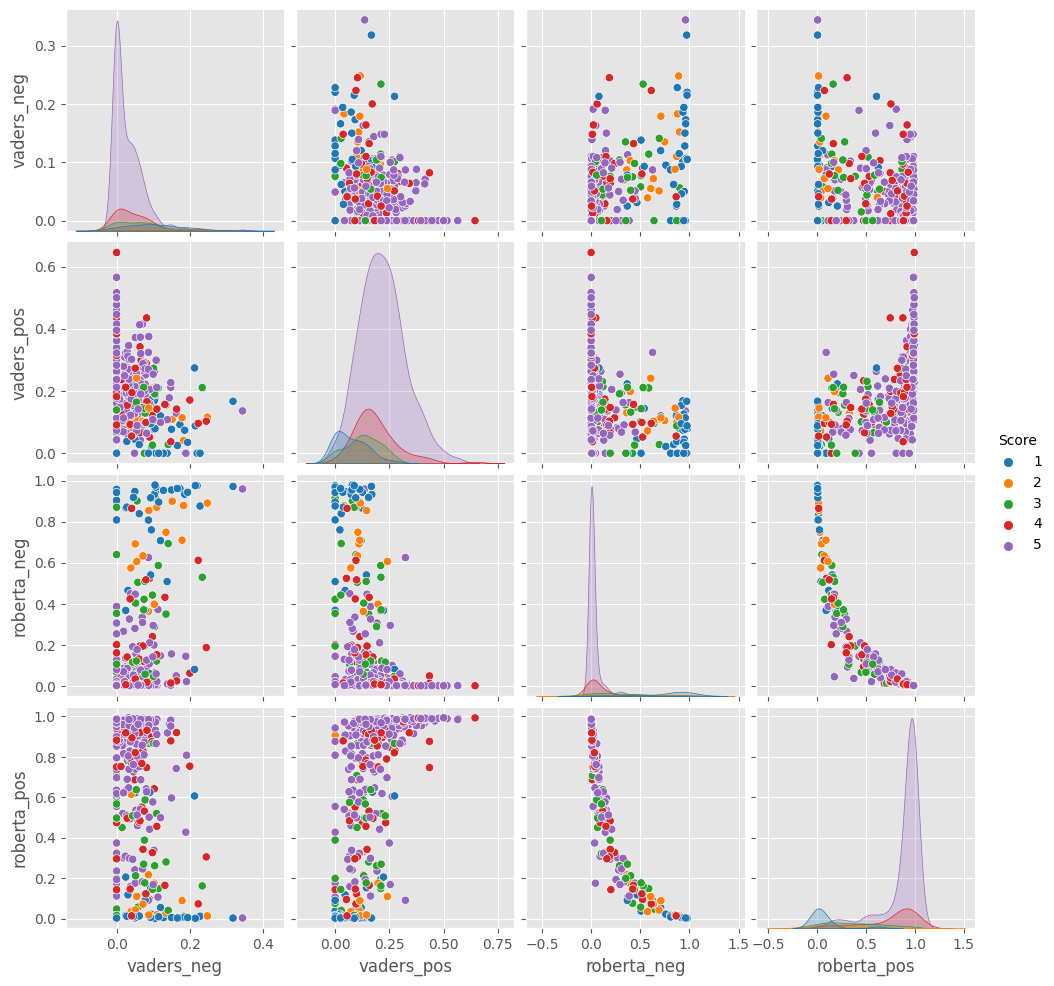

In [ ]:
sns.pairplot(data=results,vars=['vaders_neg', 'vaders_pos', 'roberta_neg','roberta_pos'], hue='Score',palette='tab10')

# Step 4: Review Examples:

- Positive 1-Star and Negative 5-Star Reviews

Lets look at some examples where the model scoring and review score differ the most.

In [ ]:
print(results.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0])
print(results.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['roberta_pos'].values[0])

I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.
0.6256365776062012


In [ ]:
print(results.query('Score == 1') \
    .sort_values('vaders_pos', ascending=False)['Text'].values[0])
print(results.query('Score == 1') \
    .sort_values('vaders_pos', ascending=False)['vaders_pos'].values[0])

So we cancelled the order.  It was cancelled without any problem.  That is a positive note...
0.274


In [ ]:
print(results.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0])
print(results.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['roberta_neg'].values[0])

this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault
0.9601579308509827


In [ ]:
print(results.query('Score == 5') \
    .sort_values('vaders_neg', ascending=False)['Text'].values[0])
print(results.query('Score == 5') \
    .sort_values('vaders_neg', ascending=False)['vaders_neg'].values[0])

this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault
0.344


# The Transformers Pipeline
- Quick & easy way to run sentiment predictions

In [ ]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
sent_pipeline('I love sentiment analysis!')

[{'label': 'POSITIVE', 'score': 0.9997853636741638}]